In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [33]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [34]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

## Initialize Configs

In [35]:
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '0c3ad11b-5085-478a-b3ae-f5fdecbfca77'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [36]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [37]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [38]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(228, 33)

In [39]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:27:21.820,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.795523,1.000000,0.000000,0.793644,1.000000,0.000000,0.800629,1.000000,0.000000,0.797200
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.791138,1.000000,0.000000,0.792015,1.000000,0.000000,0.792772,1.000000,0.000000,0.792400
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:27:21.826,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.736213,1.000000,0.000000,0.743795,1.000000,0.000000,0.738732,1.000000,0.000000,0.741200
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.734634,1.000000,0.000000,0.748718,1.000000,0.000000,0.734439,1.000000,0.000000,0.741400
12,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:27:21.820,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.680644,0.636544,0.852218,0.685393,0.644940,0.840976,0.671159,0.626371,0.851016,0.678146
13,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.687466,0.643243,0.854980,0.694396,0.653941,0.848451,0.677072,0.631400,0.851795,0.685576
14,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:27:21.826,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.723635,0.674977,0.859436,0.716486,0.670080,0.851207,0.725501,0.675543,0.866754,0.721106
15,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.732455,0.684429,0.865410,0.729253,0.684775,0.861777,0.733000,0.683846,0.868942,0.731173
24,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:27:21.820,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.798774,1.000000,0.000000,0.767287,1.000000,0.000000,0.815152,1.000000,0.000000,0.793986
25,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.795341,1.000000,0.000000,0.767902,1.000000,0.000000,0.807727,1.000000,0.000000,0.790006


In [40]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [41]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.791138,1.000000,0.000000,0.792015,1.000000,0.000000,0.792772,1.000000,0.000000,0.792400
13,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.687466,0.643243,0.854980,0.694396,0.653941,0.848451,0.677072,0.631400,0.851795,0.685576
25,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.795341,1.000000,0.000000,0.767902,1.000000,0.000000,0.807727,1.000000,0.000000,0.790006
37,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.185880,0.000000,1.000000,0.182874,0.000000,1.000000,0.188278,0.000000,1.000000,0.185950
49,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.231707,0.000000,1.000000,0.226249,0.000000,1.000000,0.229140,0.000000,1.000000,0.227561
61,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.078250,0.073758,0.095263,0.077528,0.073279,0.093705,0.077271,0.072767,0.094502,0.077397
73,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.118740,0.088565,0.233039,0.119536,0.090072,0.231734,0.112512,0.083697,0.222749,0.115960
85,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.860328,0.896383,0.723757,0.858220,0.894239,0.721058,0.869102,0.902973,0.739526,0.863760
97,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.494759,0.501209,0.470329,0.523223,0.542686,0.449111,0.484026,0.484129,0.483632,0.503268
109,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-11-21 14:28:33.115,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.710694,0.665259,0.882792,0.716885,0.675366,0.874990,0.700133,0.653192,0.879710,0.708356


In [42]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.734634,1.000000,0.000000,0.748718,1.000000,0.000000,0.734439,1.000000,0.000000,0.741400
15,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.732455,0.684429,0.865410,0.729253,0.684775,0.861777,0.733000,0.683846,0.868942,0.731173
27,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.645152,1.000000,0.000000,0.569420,1.000000,0.000000,0.681190,1.000000,0.000000,0.636491
39,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.245236,0.000000,1.000000,0.218147,0.000000,1.000000,0.259674,0.000000,1.000000,0.245333
51,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.274822,0.000000,1.000000,0.260224,0.000000,1.000000,0.269219,0.000000,1.000000,0.264286
63,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.082554,0.075834,0.101158,0.081260,0.074659,0.100931,0.082779,0.076542,0.100026,0.082038
75,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.140656,0.105496,0.237994,0.133908,0.098740,0.238694,0.144624,0.111105,0.237325,0.139400
87,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.832277,0.875530,0.712537,0.840656,0.884055,0.711347,0.827356,0.868544,0.713446,0.833840
99,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.555990,0.601470,0.430084,0.585107,0.648630,0.395837,0.544442,0.576318,0.456282,0.564266
111,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-11-21 14:28:33.118,0c3ad11b-5085-478a-b3ae-f5fdecbfca77,Exp_iter_1,...,0.755189,0.705492,0.892768,0.751409,0.705159,0.889215,0.755852,0.705316,0.895615,0.753686


In [43]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [44]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.005405,-0.013886,-0.000703,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.002891,-0.031831,-0.025173,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,-0.005405,0.013886,0.000703,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.117156,1.096343,1.131075,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.118315,0.100215,0.137264,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,-0.000757,0.007078,0.009462,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,0.987478,1.032493,1.029906,RandomForestClassifier,Exp_iter_1,0.7,0
7,Label_Stability_Difference,-0.010883,0.027830,0.025729,RandomForestClassifier,Exp_iter_1,0.7,0
8,IQR_Parity,0.000256,-0.006984,-0.006391,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Parity,0.000439,-0.007719,-0.006061,RandomForestClassifier,Exp_iter_1,0.7,0


In [45]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.005405,-0.013886,-0.000703,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.002891,-0.031831,-0.025173,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,-0.005405,0.013886,0.000703,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.117156,1.096343,1.131075,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.118315,0.100215,0.137264,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [46]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [47]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

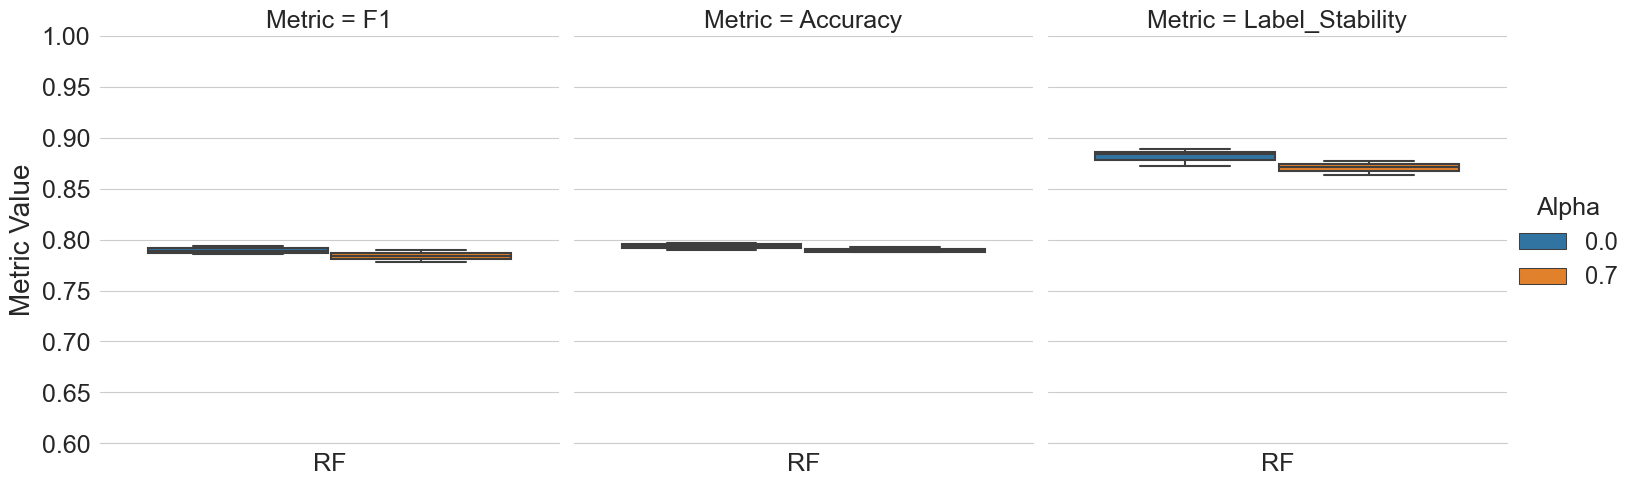

In [48]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

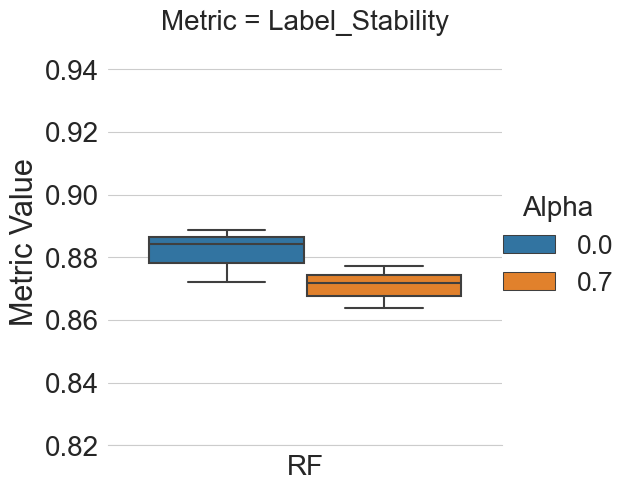

In [49]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

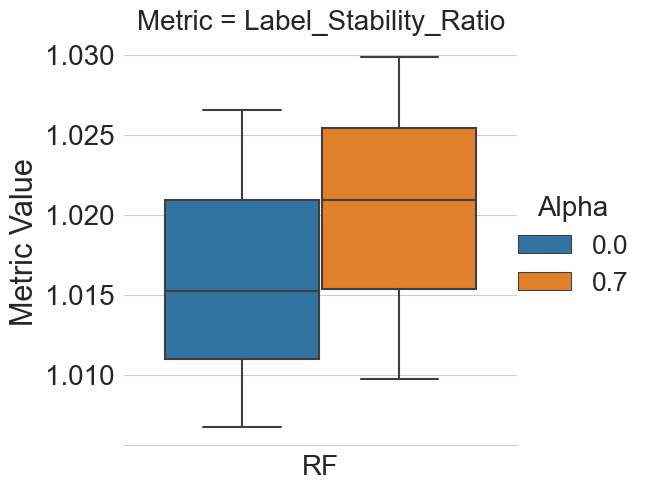

In [50]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

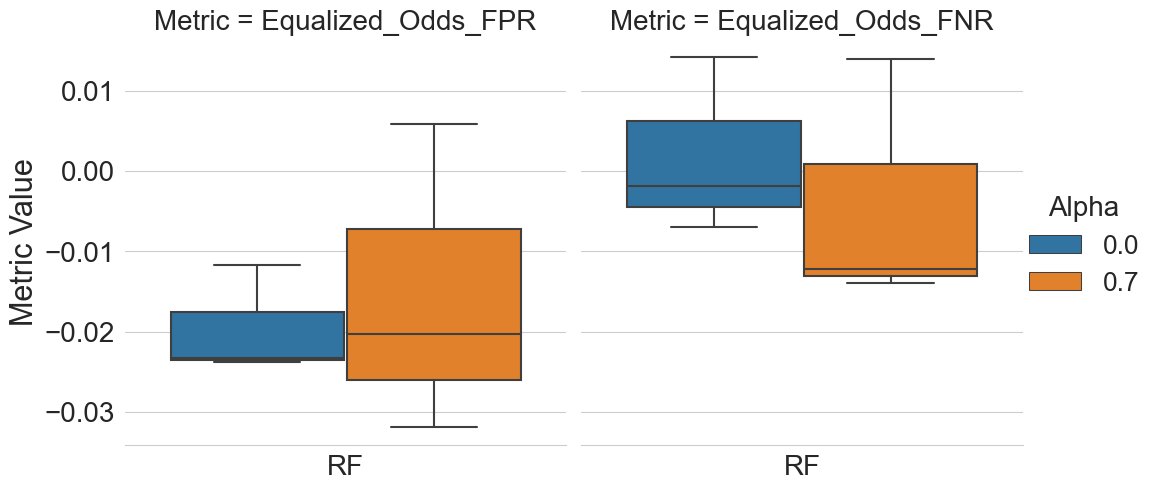

In [51]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [52]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 1200x600 with 0 Axes>

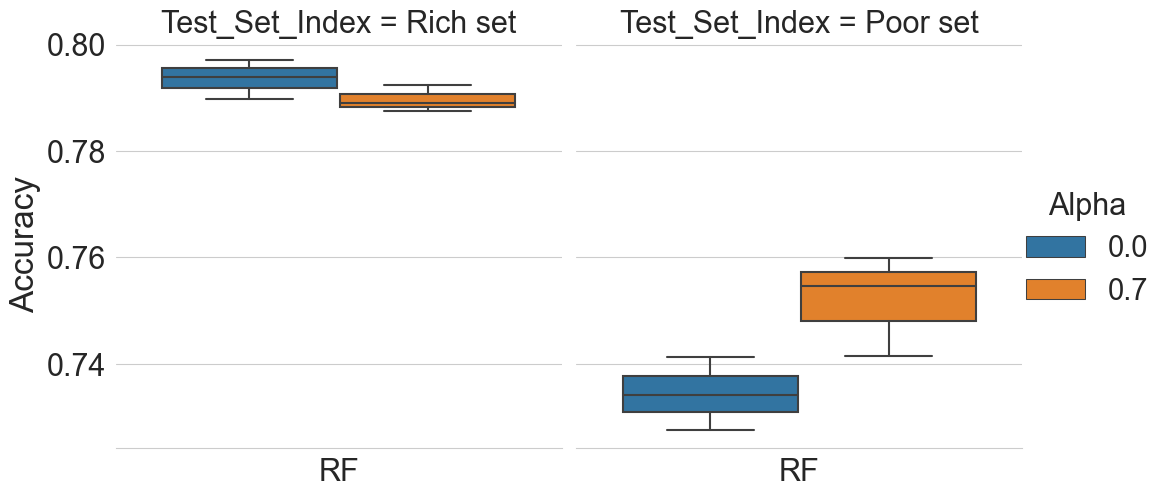

In [53]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

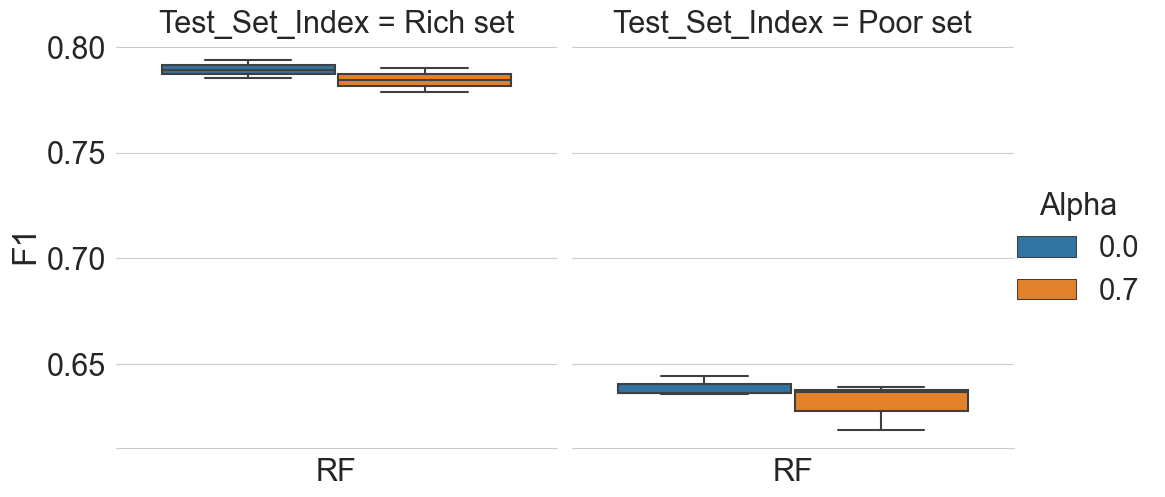

In [54]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

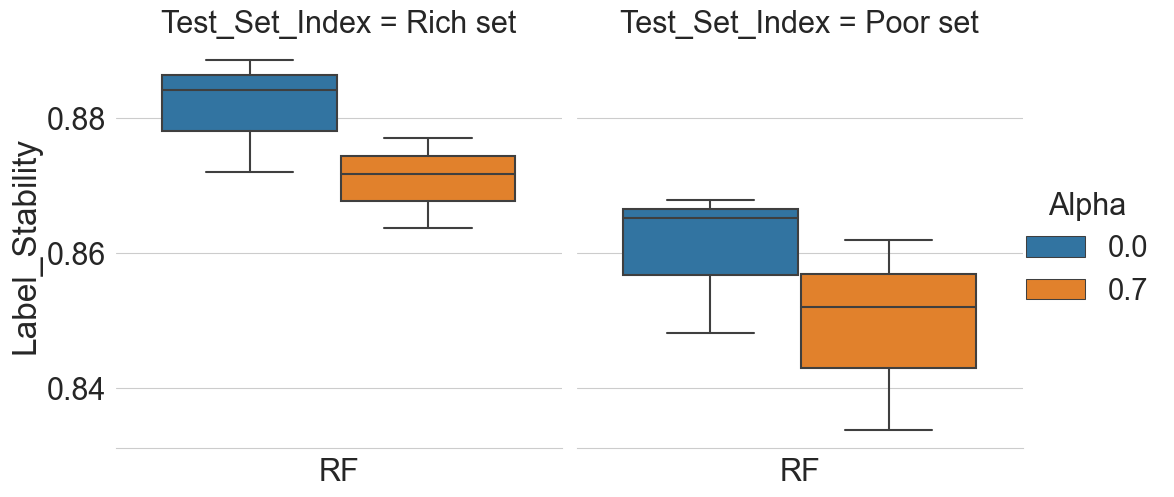

In [55]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

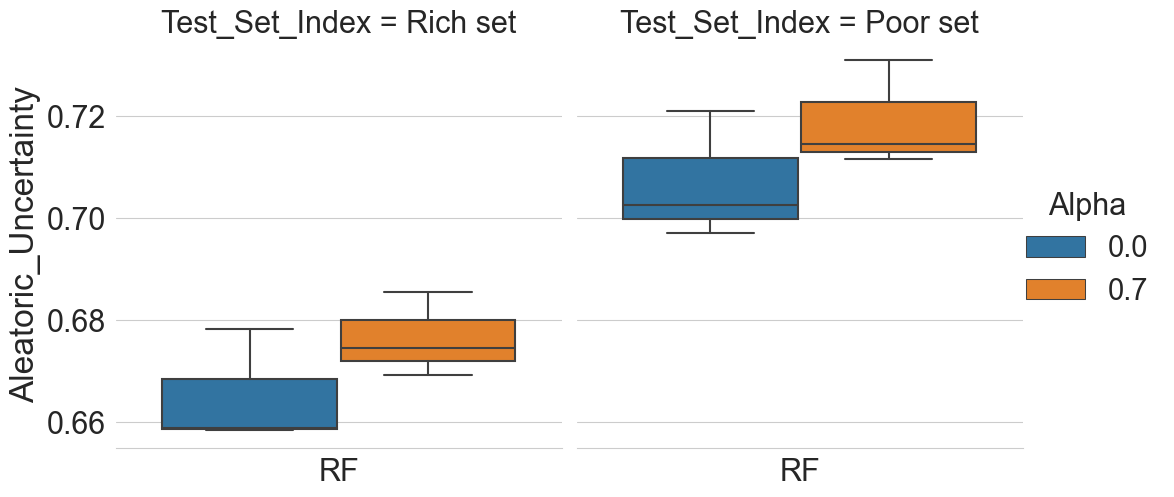

In [56]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

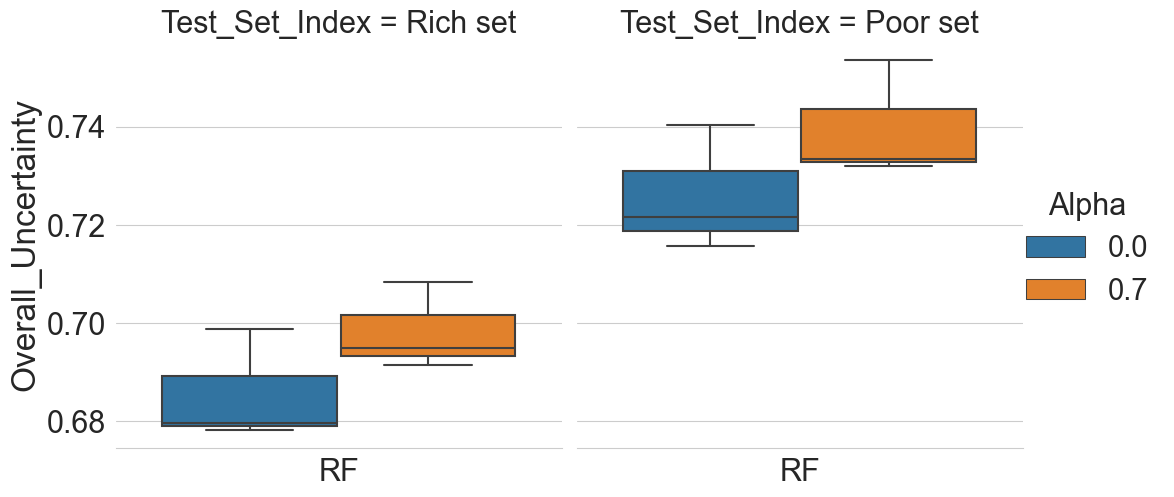

In [57]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

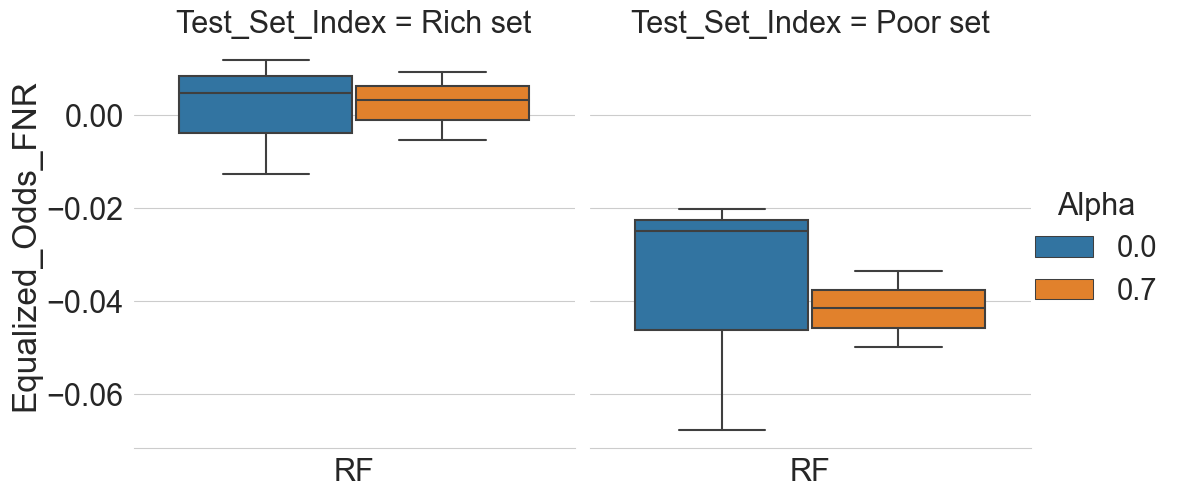

In [58]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

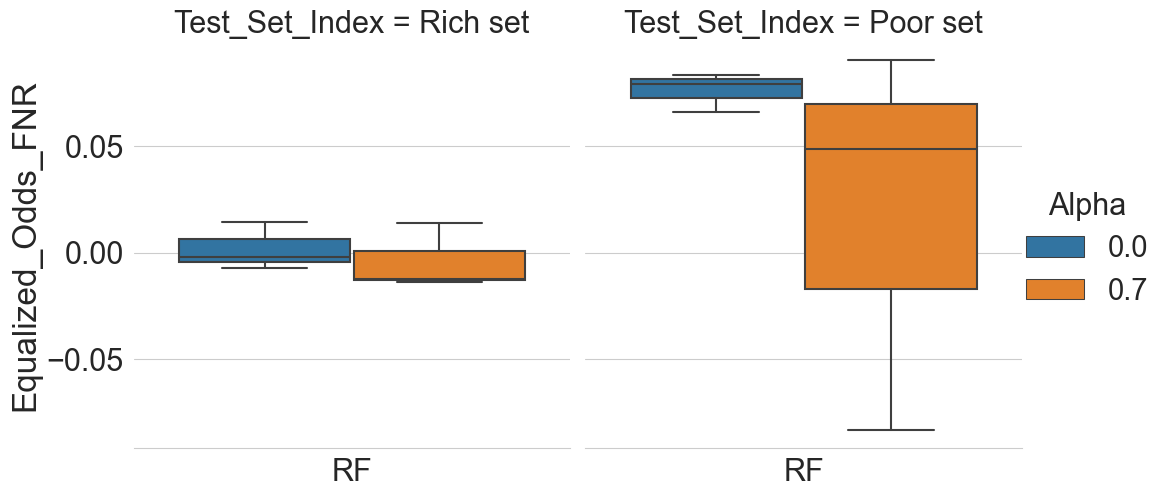

In [59]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

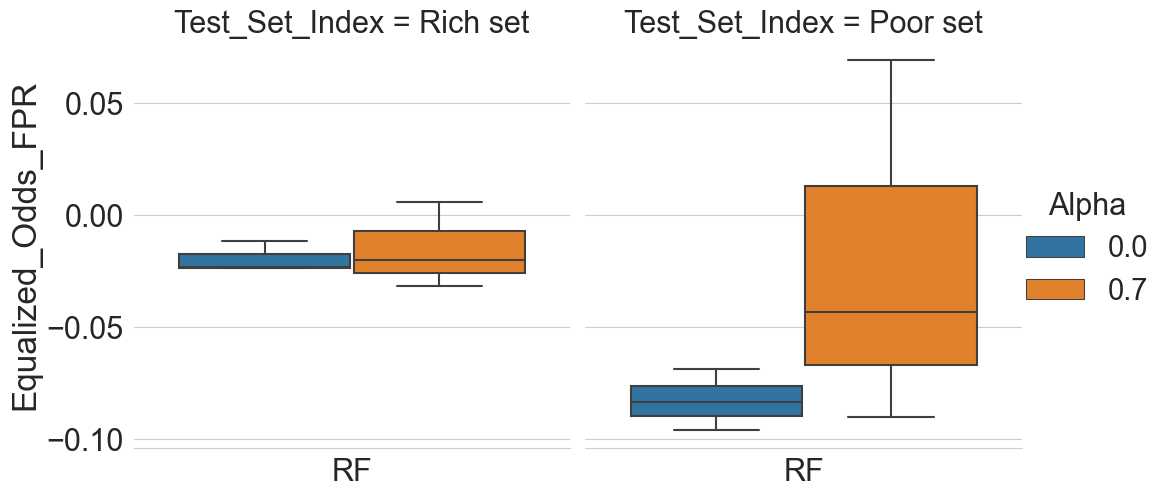

In [60]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)